In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib
%matplotlib inline

## Import data

### Global results

In [2]:
df1 = pd.read_csv('globalResults-1-6.csv', sep=',')
df2 = pd.read_csv('globalResults-7-16.csv', sep='\t')
df = pd.concat([df1,df2])

df.insert(1, 'Condition', df['Image name'].apply(lambda x: x.split('_')[0]))
df.insert(2, 'Mouse ID', df['Image name'].apply(lambda x: x.split('_')[1]))
df.insert(3, 'Duplicate', df['Image name'].apply(lambda x: x.split('_')[2]))
df.head()

Image name Condition Mouse ID Duplicate  \
0  Young_M6_dpl1     Young       M6      dpl1   
1  Young_M6_dpl1     Young       M6      dpl1   
2  Young_M6_dpl1     Young       M6      dpl1   
3  Young_M6_dpl1     Young       M6      dpl1   
4  Young_M6_dpl1     Young       M6      dpl1   

                        Region name  Region area  DAPI bg int mean  \
0             root_grey_CB_CBN_VeCB   197111.599           595.904   
1               root_grey_CB_CBN_FN   324909.510           835.208   
2         root_grey_CB_CBX_HEM_COPY   538003.466          3269.649   
3  root_grey_CB_CBX_VERM_CENT_CENT2   139974.758           385.545   
4  root_grey_CB_CBX_VERM_CENT_CENT3   467982.661          1794.275   

   DAPI bg int sd  Cy5 bg int mean  Cy5 bg int sd  Cy3 bg int mean  \
0         594.857         1492.213        512.836         1139.241   
1         820.937         1618.837        292.989         1503.656   
2        3247.734         1692.075        480.651         1336.665   
3        1015.493          497.972        432.800          444.219   
4        2750.469         1192.102        414.140          897.837   

   Cy3 bg int sd  Nb DAPI+  Nb DAPI+ Cy5+  Nb DAPI+ Cy3+  Nb DAPI+ Cy5- Cy3-  \
0        283.361       226             21             25                 194   
1        360.222       499             21             20                 468   
2        292.693        90             21              1                  68   
3        263.571        20              7              4                  13   
4        268.421        23              2              1                  20   

   Nb DAPI+ Cy5+ Cy3-  Nb DAPI+ Cy5- Cy3+  Nb DAPI+ Cy5+ Cy3+  
0                   7                  11                  14  
1                  11                  10                  10  
2                  21                   1                   0  
3                   3                   0                   4  
4                   2                   1                   0

In [3]:
print('Nb images: ' + str(df['Image name'].nunique()))
print('Nb regions: ' + str(len(df)))
print('Nb unique regions: ' + str(df['Region name'].nunique()))

Nb images: 16
Nb regions: 2914
Nb unique regions: 356


Text(0, 0.5, 'Image')

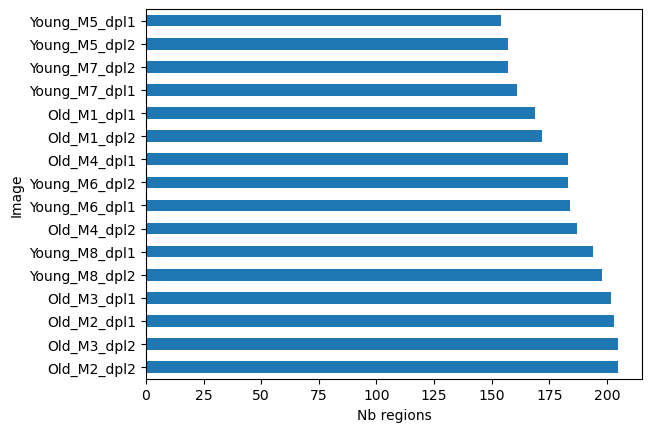

In [4]:
ax = df['Image name'].value_counts().plot(kind='barh')
ax.set_xlabel("Nb regions")
ax.set_ylabel("Image")

Text(0, 0.5, 'Region')

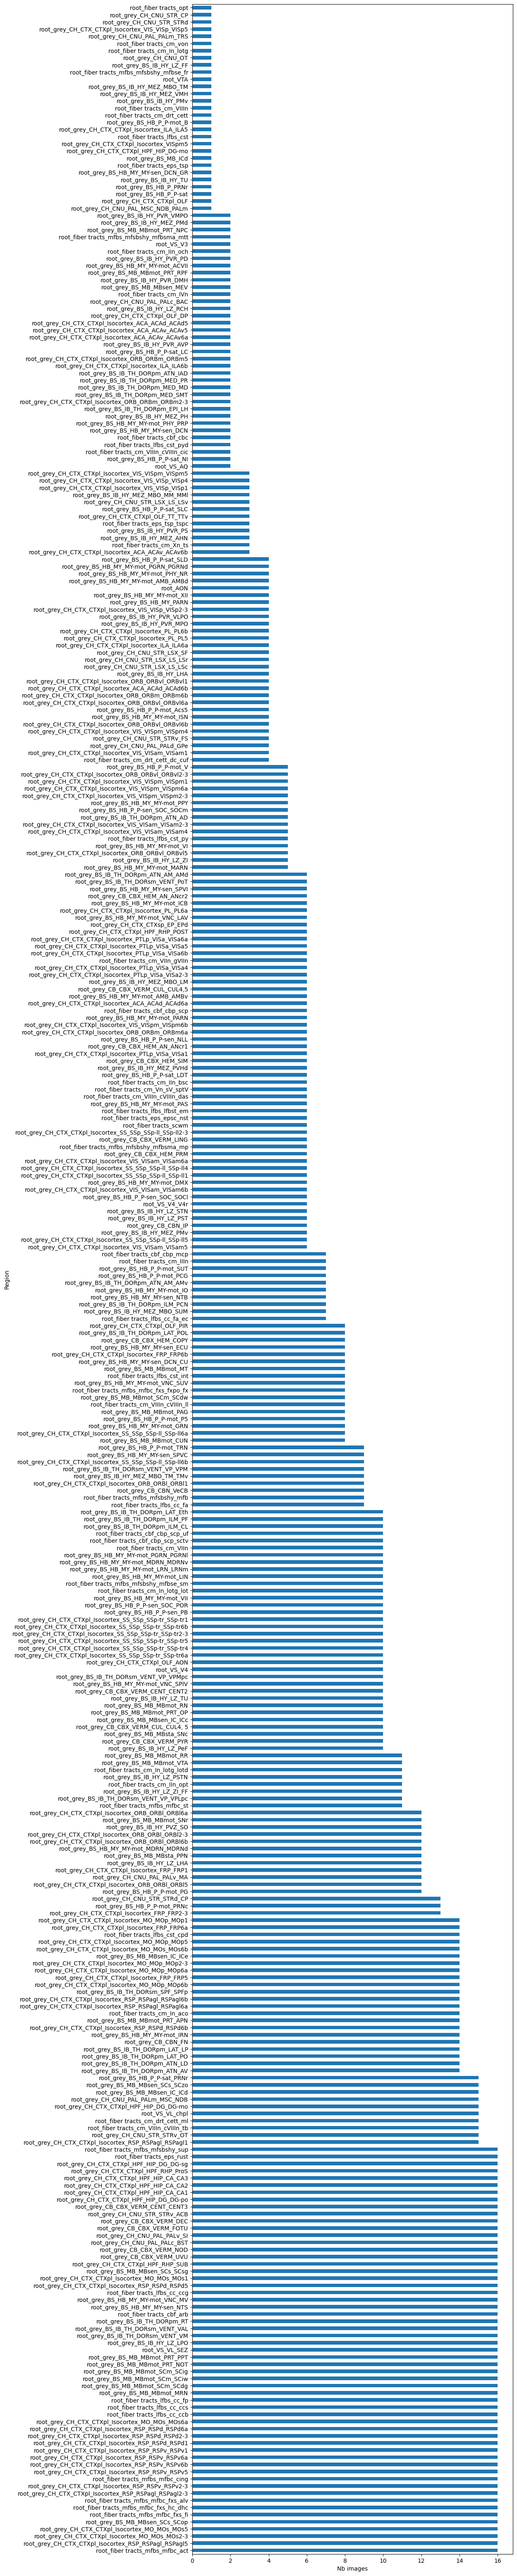

In [5]:
ax = df['Region name'].value_counts().plot(kind='barh', figsize=(10,80))
ax.set_xlabel("Nb images")
ax.set_ylabel("Region")

### Cells results

In [6]:
dfCell1 = pd.read_csv('cellsResults-1-6.csv', sep=',')
dfCell2 = pd.read_csv('cellsResults-7-16.csv', sep='\t')
dfCell = pd.concat([dfCell1,dfCell2])

dfCell.insert(1, 'Condition', dfCell['Image name'].apply(lambda x: x.split('_')[0]))
dfCell.insert(2, 'Mouse ID', dfCell['Image name'].apply(lambda x: x.split('_')[1]))
dfCell.insert(3, 'Duplicate', dfCell['Image name'].apply(lambda x: x.split('_')[2]))
dfCell.head()

Image name Condition Mouse ID Duplicate            Region name  \
0  Young_M6_dpl1     Young       M6      dpl1  root_grey_CB_CBN_VeCB   
1  Young_M6_dpl1     Young       M6      dpl1  root_grey_CB_CBN_VeCB   
2  Young_M6_dpl1     Young       M6      dpl1  root_grey_CB_CBN_VeCB   
3  Young_M6_dpl1     Young       M6      dpl1  root_grey_CB_CBN_VeCB   
4  Young_M6_dpl1     Young       M6      dpl1  root_grey_CB_CBN_VeCB   

   Nuc area  Nuc circularity  Nuc DAPI int mean  Nuc DAPI int sd  \
0    66.675            0.954           1292.867          568.735   
1    26.459            0.926           2334.750          826.683   
2    45.733            0.780           3235.254         1731.194   
3    38.743            0.954           2869.234         1832.921   
4    77.914            0.964           1348.305          620.200   

   Nuc Cy5 int mean  ...  Cy5 int mean  Cy5 int sd  is Cy3?  Cy3 area  \
0           275.705  ...           NaN         NaN    False       NaN   
1           267.068  ...           NaN         NaN    False       NaN   
2           631.771  ...           NaN         NaN    False       NaN   
3             7.536  ...           NaN         NaN    False       NaN   
4           242.230  ...           NaN         NaN    False       NaN   

   Cy3 int mean  Cy3 int sd  Cyto Cy5 area  Cyto Cy5 int mean  Cyto Cy3 area  \
0           NaN         NaN            NaN                NaN            NaN   
1           NaN         NaN            NaN                NaN            NaN   
2           NaN         NaN            NaN                NaN            NaN   
3           NaN         NaN            NaN                NaN            NaN   
4           NaN         NaN            NaN                NaN            NaN   

   Cyto Cy3 int mean  
0                NaN  
1                NaN  
2                NaN  
3                NaN  
4                NaN  

[5 rows x 25 columns]

In [7]:
print('Nb images: ' + str(dfCell['Image name'].nunique()))
print('Nb regions: ' + str(dfCell.groupby(['Image name', 'Region name']).ngroups))
print('Nb unique regions: ' + str(dfCell['Region name'].nunique()))
print('Nb cells: ' + str(dfCell.shape[0]))

Nb images: 16
Nb regions: 2861
Nb unique regions: 352
Nb cells: 1074614


Text(0, 0.5, 'Region')

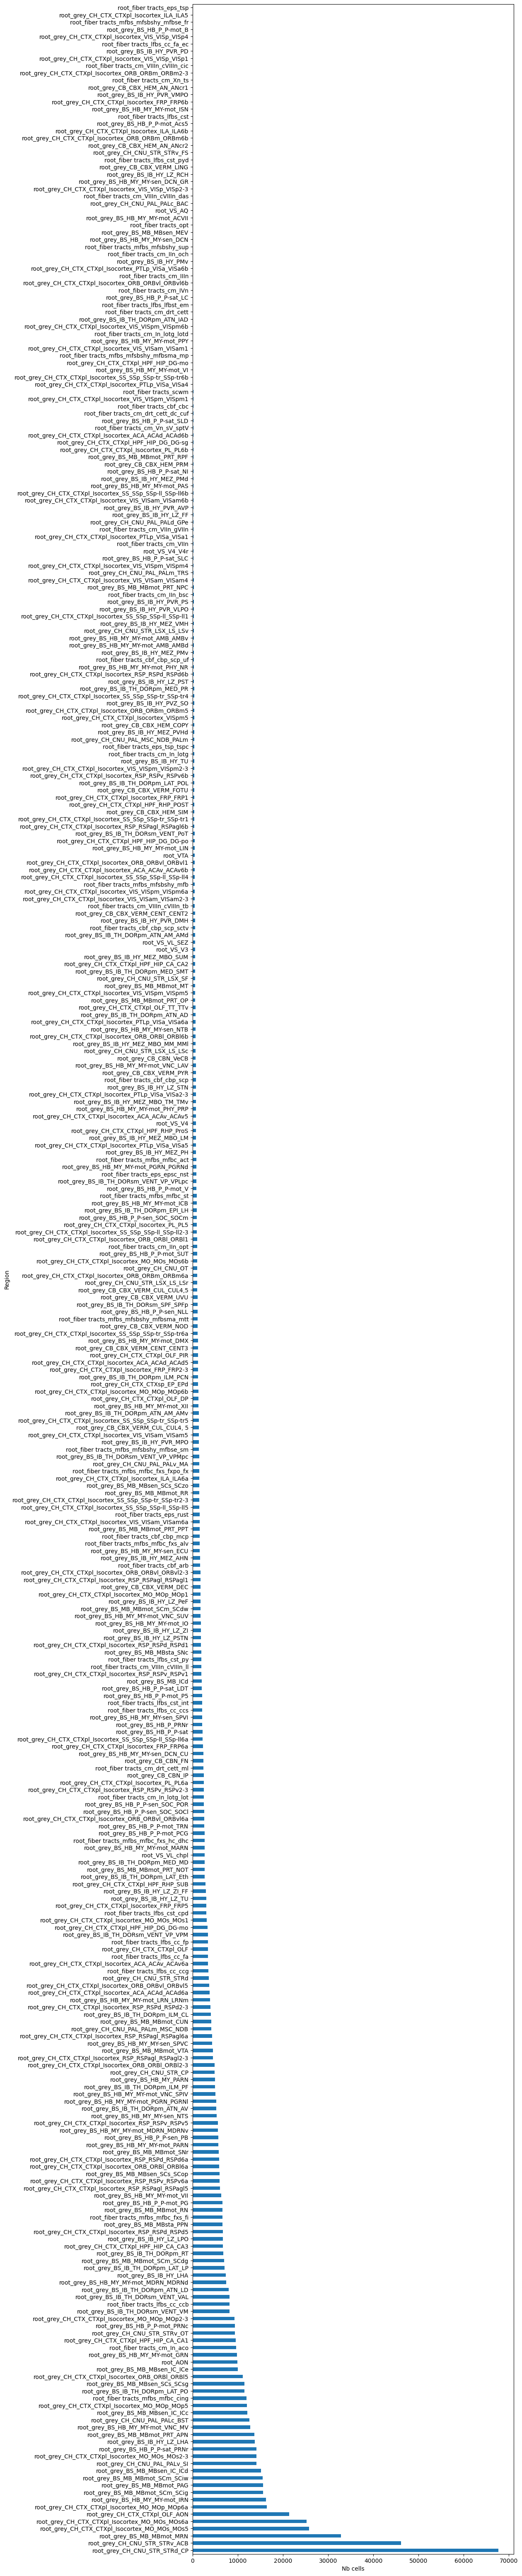

In [8]:
ax = dfCell['Region name'].value_counts().plot(kind='barh', figsize=(10,80))
ax.set_xlabel("Nb cells")
ax.set_ylabel("Region")

## Select region

In [9]:
regionToAdd1 = 'root_grey_BS_MB_MBmot'
regionToAdd2 = None
regionToAdd3 = None

regionToRemove1 = 'root_grey_BS_MB_MBmot_SCm'
regionToRemove2 = None
regionToRemove3 = None

In [10]:
region = df['Region name'].str.contains(regionToAdd1) 
if(regionToAdd2 is not None): region = region | df['Region name'].str.contains(regionToAdd2)
if(regionToAdd3 is not None): region = region | df['Region name'].str.contains(regionToAdd3)

if(regionToRemove1 is not None): region = region & (df['Region name'].str.contains(regionToRemove1)==False)
if(regionToRemove2 is not None): region = region & (df['Region name'].str.contains(regionToRemove2)==False)
if(regionToRemove3 is not None): region = region & (df['Region name'].str.contains(regionToRemove3)==False)

dfReg = df[region]
dfReg.head()

Image name Condition Mouse ID Duplicate  \
129  Young_M6_dpl1     Young       M6      dpl1   
130  Young_M6_dpl1     Young       M6      dpl1   
131  Young_M6_dpl1     Young       M6      dpl1   
132  Young_M6_dpl1     Young       M6      dpl1   
133  Young_M6_dpl1     Young       M6      dpl1   

                       Region name  Region area  DAPI bg int mean  \
129       root_grey_BS_MB_MBmot_MT    54396.743           661.064   
130  root_grey_BS_MB_MBmot_PRT_PPT    49958.945           904.131   
131  root_grey_BS_MB_MBmot_PRT_NOT   113750.465           712.278   
132   root_grey_BS_MB_MBmot_PRT_OP     7342.907           831.485   
133  root_grey_BS_MB_MBmot_PRT_APN   767002.807           717.919   

     DAPI bg int sd  Cy5 bg int mean  Cy5 bg int sd  Cy3 bg int mean  \
129         702.794         1516.306        221.553         1563.533   
130         819.232         1334.212        231.325         1348.246   
131         720.100         1191.454        277.332         1112.359   
132         776.092         1378.898        221.051         1408.090   
133         636.627         1422.130        252.299         1502.370   

     Cy3 bg int sd  Nb DAPI+  Nb DAPI+ Cy5+  Nb DAPI+ Cy3+  \
129        198.776        84             20             29   
130        197.060        77             25             21   
131        259.255       141             25             25   
132        203.938        17              5              6   
133        220.496      1376            311            388   

     Nb DAPI+ Cy5- Cy3-  Nb DAPI+ Cy5+ Cy3-  Nb DAPI+ Cy5- Cy3+  \
129                  52                   3                  12   
130                  48                   8                   4   
131                 105                  11                  11   
132                  11                   0                   1   
133                 909                  79                 156   

     Nb DAPI+ Cy5+ Cy3+  
129                  17  
130                  17  
131                  14  
132                   5  
133                 232

In [11]:
print('Nb images: ' + str(dfReg['Image name'].nunique()))
print('Nb regions: ' + str(len(dfReg)))
print('Nb unique regions: ' + str(dfReg['Region name'].nunique()))

Nb images: 16
Nb regions: 144
Nb unique regions: 14


In [12]:
region = dfCell['Region name'].str.contains(regionToAdd1) 
if(regionToAdd2 is not None): region = region | dfCell['Region name'].str.contains(regionToAdd2)
if(regionToAdd3 is not None): region = region | dfCell['Region name'].str.contains(regionToAdd3)

if(regionToRemove1 is not None): region = region & (dfCell['Region name'].str.contains(regionToRemove1)==False)
if(regionToRemove2 is not None): region = region & (dfCell['Region name'].str.contains(regionToRemove2)==False)
if(regionToRemove3 is not None): region = region & (dfCell['Region name'].str.contains(regionToRemove3)==False)

dfCellReg = dfCell[region]
dfCellReg.head()

Image name Condition Mouse ID Duplicate               Region name  \
56949  Young_M6_dpl1     Young       M6      dpl1  root_grey_BS_MB_MBmot_MT   
56950  Young_M6_dpl1     Young       M6      dpl1  root_grey_BS_MB_MBmot_MT   
56951  Young_M6_dpl1     Young       M6      dpl1  root_grey_BS_MB_MBmot_MT   
56952  Young_M6_dpl1     Young       M6      dpl1  root_grey_BS_MB_MBmot_MT   
56953  Young_M6_dpl1     Young       M6      dpl1  root_grey_BS_MB_MBmot_MT   

       Nuc area  Nuc circularity  Nuc DAPI int mean  Nuc DAPI int sd  \
56949    36.154            0.966           3820.705         2104.160   
56950    92.615            0.908           1004.871          715.451   
56951   119.059            0.874           2272.747         1876.741   
56952    33.939            0.969           5847.184         2624.163   
56953    28.449            0.898           3326.186         1576.882   

       Nuc Cy5 int mean  ...  Cy5 int mean  Cy5 int sd  is Cy3?  Cy3 area  \
56949           -86.789  ...           NaN         NaN    False       NaN   
56950          -171.174  ...           NaN         NaN    False       NaN   
56951           747.317  ...        794.97     399.567     True    124.86   
56952          -297.145  ...           NaN         NaN    False       NaN   
56953          -308.502  ...           NaN         NaN    False       NaN   

       Cy3 int mean  Cy3 int sd  Cyto Cy5 area  Cyto Cy5 int mean  \
56949           NaN         NaN            NaN                NaN   
56950           NaN         NaN            NaN                NaN   
56951       370.625     395.178         -1.422          -3194.846   
56952           NaN         NaN            NaN                NaN   
56953           NaN         NaN            NaN                NaN   

       Cyto Cy3 area  Cyto Cy3 int mean  
56949            NaN                NaN  
56950            NaN                NaN  
56951          5.801            655.681  
56952            NaN                NaN  
56953            NaN                NaN  

[5 rows x 25 columns]

In [13]:
print('Nb images: ' + str(dfCellReg['Image name'].nunique()))
print('Nb regions: ' + str(dfCellReg.groupby(['Image name', 'Region name']).ngroups))
print('Nb unique regions: ' + str(dfCellReg['Region name'].nunique()))
print('Nb cells: ' + str(dfCellReg.shape[0]))

Nb images: 16
Nb regions: 144
Nb unique regions: 14
Nb cells: 90338


Region name
root_grey_BS_MB_MBmot_CUN         4119
root_grey_BS_MB_MBmot_MRN        32852
root_grey_BS_MB_MBmot_MT           554
root_grey_BS_MB_MBmot_PAG        15573
root_grey_BS_MB_MBmot_PRT_APN    13693
root_grey_BS_MB_MBmot_PRT_NOT     2669
root_grey_BS_MB_MBmot_PRT_NPC      243
root_grey_BS_MB_MBmot_PRT_OP       588
root_grey_BS_MB_MBmot_PRT_PPT     1539
root_grey_BS_MB_MBmot_PRT_RPF      155
root_grey_BS_MB_MBmot_RN          6598
root_grey_BS_MB_MBmot_RR          1463
root_grey_BS_MB_MBmot_SNr         5802
root_grey_BS_MB_MBmot_VTA         4490
dtype: int64


Text(0, 0.5, 'Region')

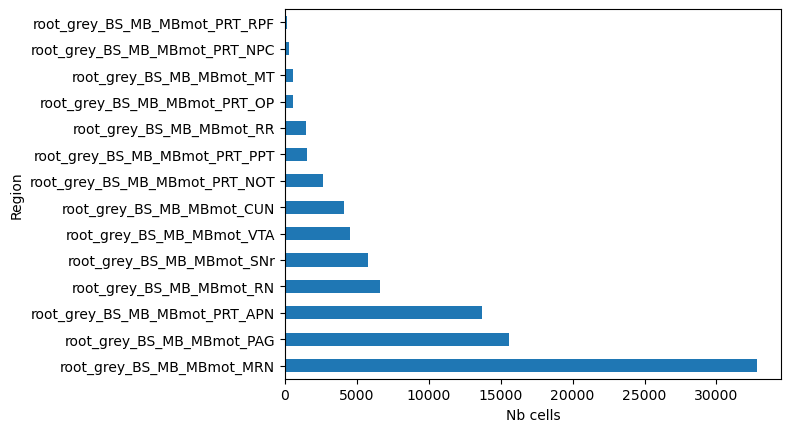

In [15]:
print(dfCellReg.groupby('Region name').size())

ax = dfCellReg['Region name'].value_counts().plot(kind='barh')
ax.set_xlabel("Nb cells")
ax.set_ylabel("Region")

## Analyze region

### Cells identity

In [25]:
for name, group in dfReg.groupby('Mouse ID'):
    print('\n'+name)
    print("Neurons expressing ORF1p: {:.2%}".format(group["Nb DAPI+ Cy5+ Cy3+"].sum()/group["Nb DAPI+ Cy5+"].sum()))
    print("ORF1p cells being neuronal: {:.2%}".format(group["Nb DAPI+ Cy5+ Cy3+"].sum()/group["Nb DAPI+ Cy3+"].sum()))


M1
Neurons expressing ORF1p: 53.27%
ORF1p cells being neuronal: 63.15%

M2
Neurons expressing ORF1p: 48.33%
ORF1p cells being neuronal: 49.48%

M3
Neurons expressing ORF1p: 59.05%
ORF1p cells being neuronal: 56.52%

M4
Neurons expressing ORF1p: 67.95%
ORF1p cells being neuronal: 54.58%

M5
Neurons expressing ORF1p: 41.32%
ORF1p cells being neuronal: 72.50%

M6
Neurons expressing ORF1p: 69.32%
ORF1p cells being neuronal: 60.10%

M7
Neurons expressing ORF1p: 55.83%
ORF1p cells being neuronal: 58.88%

M8
Neurons expressing ORF1p: 49.55%
ORF1p cells being neuronal: 64.15%


### Cells intensity

In [26]:
dfCellNeunOrf1p = dfCellReg[(dfCellReg['is Cy5?']==True) & (dfCellReg['is Cy3?'] == True)]
print('Nb cells: ' + str(dfCellNeunOrf1p.shape[0]))

Nb cells: 8882


Text(0, 0.5, 'ORF1p mean intensity per cell')

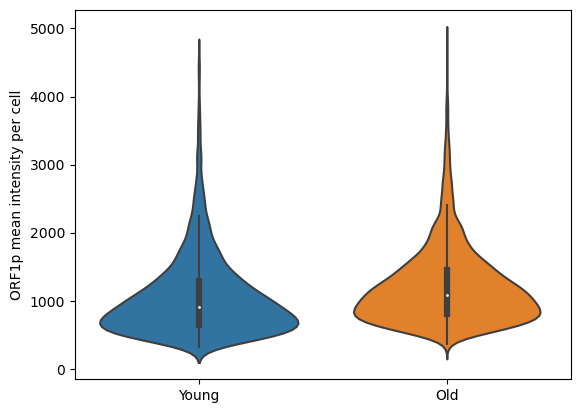

In [29]:
ax = sb.violinplot(dfCellNeunOrf1p, x='Condition', y='Cy3 int mean')
ax.set_xlabel("")
ax.set_ylabel("ORF1p mean intensity per cell")

Text(0.5, 0, 'Cell ORF1p mean intensity')

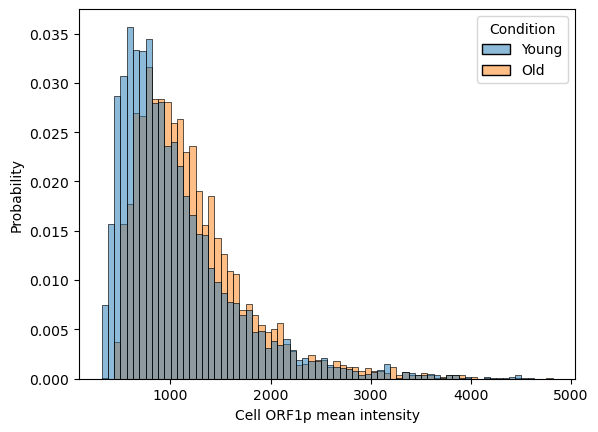

In [30]:
ax = sb.histplot(dfCellNeunOrf1p, x='Cy3 int mean', hue='Condition', stat='probability')
ax.set_xlabel("Cell ORF1p mean intensity")